In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from __future__ import division

#1.  Import the spam dataset and print the first six rows.  

In [2]:
dataDir="./Mid_Term_Data/spam_dataset.csv"
df=pd.read_csv(dataDir)
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [3]:
#make sure to drop all NA value
print(df.shape)
df_1=df.dropna()
print(df_1.shape)
#SInce there is no difference, 'df' will continue to be used in the next for convenience.

(4601, 58)
(4601, 58)


#2. The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

In my perspective, word_freq_business, word_freq_conference, char_freq_! is the three most important predictors in a model of spam. Usually spam emails are commercial emails and they usually ask for collaboration chances in business or ask you to attend some strange conferences. And to stress the significance of themselves, ! is the most frequent symbol in the email according to my experience.


#3. Visualize the univariate distribution of each of the variables in the previous question.  

In [4]:
y=df["spam"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [5]:
X1=df.iloc[:, 16]   #business
X2=df.iloc[:, 47] #conference
X3=df.iloc[:,51] #CHAR_!


print (X1.head())
print(X2.head())
print(X3.head())

0    0.00
1    0.07
2    0.06
3    0.00
4    0.00
Name: word_freq_business:, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: word_freq_conference:, dtype: float64
0    0.778
1    0.372
2    0.276
3    0.137
4    0.135
Name: char_freq_!:, dtype: float64


In [6]:
X=df.iloc[:,[16,47, 51]]
X.head()

,word_freq_business:,word_freq_conference:,char_freq_!:
0,0.00,0.0,0.778
1,0.07,0.0,0.372
2,0.06,0.0,0.276
3,0.00,0.0,0.137
4,0.00,0.0,0.135


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


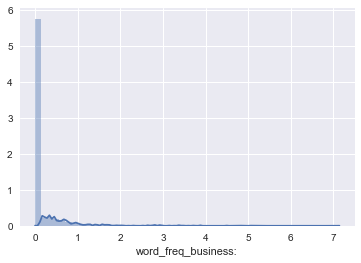

In [7]:
sns.set(color_codes=True)
sns.distplot(X1);

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


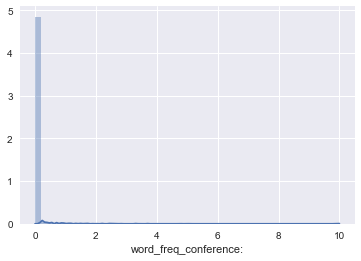

In [8]:
sns.distplot(X2);

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


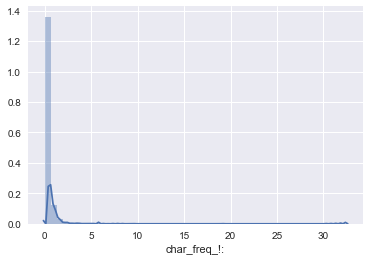

In [9]:
sns.distplot(X3,);

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


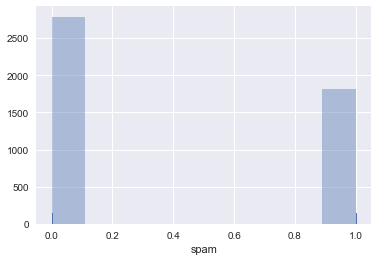

In [10]:
sns.distplot(y,kde=False, rug=True);

#4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   (Include models we have learned through class 5 only).

1. K-Nearest Neighborhood;
2. Linear Regression;
3. Logistic Regression;
4. Support Vector Machine;
5. Decision Tree;
6. Random Forest;

#5. Describe the importance of training and test data.  Why do we separate data into these subsets?

Generally speaking, it aims to avoid underfitting, overfitting and some other problems. 

Detailedly, training set and test set are used in distinct purposes. When training a model, it tries to find out some pattern in the  training data while minimizing the error rate.  After finishing trained the model, we should have a test it on fresh examples in order to avoid problems like overfitting. The purpose of the training dataset is to provide you with some algorithm. Test dataset, however, is used to assess how well your algorithm was trained with the training dataset. 

#6. What is k-fold cross validation and what do we use it for?

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. 

Steps of k-fold:
    a. Divide the data into K roughly equal parts, (ususally K=5 or 10);
    b. for each k = 1, 2, . . . K, fit the model with parameter λ to the other K − 1 parts, giving $beta^(-k) (lamda)$ and compute its error in
predicting the kth part Ek(lamda),
    This gives the cross-validation error:
    $$CV(lamda)=\frac{1}{K}\sum_{k=1}^K Ek(lamda)$$
    c. do this for many values of λ and choose the value of λ that makes CV (λ) smallest.

The fitting process optimizes the model parameters to make the model fit the training data as well as possible.
   

#7. How is k-fold cross validation different from stratified k-fold cross validation?

Stratified means ensure relative class frequency in each fold reflect relative class frequencies on the whole dataset. Generally this is done in a supervised way for classification and aims to ensure each class is (approximately) equally represented across each test fold (which are of course combined in a complementary way to form training folds). Simply k-fold can be used in an unsupervised learning.

#8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

In [11]:
#Logistic model is chosen.
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=621) 
logreg = LogisticRegression(C=1e90).fit(X_train_1, y_train_1)

print("logreg .coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train_1, y_train_1)))
print("Test set score: {:.3f}".format(logreg.score(X_test_1, y_test_1)))

predicted_vals = logreg.predict(X_test_1) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))
logreg

logreg .coef_: [[ 2.13495466 -4.30445844  1.97517449]]
Training set score: 0.755
Test set score: 0.757
logreg.predict: [1 0 0 ... 0 0 1]


LogisticRegression(C=1e+90, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#import cross validation functions from sk learn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

# K-Fold Cross Validatio
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)
print("KFold:\n{}".format(
cross_val_score(LogisticRegression(), X, y, cv=kfold)))

print("StratifiedKFold:\n{}".format(
cross_val_score(LogisticRegression(), X, y, cv=skfold)))

print("RepeatedKFold:\n{}".format(
cross_val_score(LogisticRegression(), X, y, cv=rkf)))


KFold:
[0.20955483 0.28369565 0.87717391 0.90108696 0.8326087 ]
StratifiedKFold:
[0.76764387 0.74809989 0.76221498 0.75952122 0.74755169]
RepeatedKFold:
[0.76655809 0.74130435 0.7576087  0.76086957 0.77282609 0.76438654
 0.75869565 0.74347826 0.75543478 0.77608696 0.76221498 0.74130435
 0.74673913 0.79347826 0.74782609 0.77198697 0.75543478 0.76521739
 0.75108696 0.75652174 0.76764387 0.70869565 0.76847826 0.75652174
 0.77826087 0.75895765 0.76195652 0.75108696 0.75978261 0.76195652
 0.74592834 0.75978261 0.77608696 0.74130435 0.76956522 0.73724213
 0.775      0.76847826 0.74347826 0.76521739 0.7339848  0.7826087
 0.74347826 0.76413043 0.76413043 0.75570033 0.79782609 0.73043478
 0.7576087  0.7576087 ]


In [14]:
import statsmodels.api as sm

X_train_1_new = sm.add_constant(X_train_1)
model = sm.GLM(y_train_1, X_train_1_new, family=sm.families.Binomial()).fit()

model.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:933: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   spam   No. Observations:                 3450
Model:                            GLM   Df Residuals:                     3446
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 22 Jun 2019   Deviance:                          inf
Time:                        00:02:35   Pearson chi2:                 5.63e+15
No. Iterations:                     3   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0391      0.046    -22.429      0.000      -1.130      -0.948
word_freq_business:       2.0978      0.165     12.725      0.000       1.775       2.421
word_freq_conference:    -2.6920      0.461     -5.841      0.000      -3.595      -1.789
char_freq_!:              1.8693      0.113     16.605      0.000       1.649       2.090
=========================================================================================
"""

#9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

In [15]:
#KNN is selected
#(K=5)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2, y_train_2)

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(knn.score(X_test_2, y_test_2)))

y_pred = knn.predict(X_test_2)

accuracy: 0.80


In [16]:
#K=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_2, y_train_2)

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(knn.score(X_test_2, y_test_2)))

y_pred = knn.predict(X_test_2)

accuracy: 0.80


In [17]:
y_pred # view predictions for test data

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
#Cross Validation
print("KFold:\n{}".format(
cross_val_score(KNeighborsClassifier(), X, y, cv=kfold)))

print("StratifiedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=10), X, y, cv=skfold)))
print("RepeatedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=10), X, y, cv=rkf)))

KFold:
[0.56786102 0.58478261 0.83369565 0.8923913  0.14891304]
StratifiedKFold:
[0.80998914 0.80238871 0.80456026 0.80195865 0.80413493]
RepeatedKFold:
[0.79153094 0.79782609 0.81304348 0.80217391 0.79347826 0.78284473
 0.80543478 0.8076087  0.82717391 0.79021739 0.79261672 0.81304348
 0.79673913 0.80978261 0.78695652 0.79587405 0.80326087 0.80978261
 0.79891304 0.82826087 0.78935939 0.80434783 0.80217391 0.81630435
 0.80108696 0.82084691 0.79673913 0.79891304 0.79021739 0.80108696
 0.82410423 0.80434783 0.8        0.79021739 0.80543478 0.77415852
 0.82065217 0.8        0.80217391 0.78043478 0.7980456  0.78152174
 0.80978261 0.79565217 0.83369565 0.79587405 0.79130435 0.80217391
 0.81195652 0.82065217]


In [19]:
from sklearn.model_selection import GridSearchCV
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, stratify=y)

#create dictionary data object with keys equal to parameter name 'n_neighbors' 
#for knn model and values equal to range of k values to create models for

param_grid = {'n_neighbors': np.arange(1, 15, 2)} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(X_train_2, y_train_2)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_2, y_test_2)))

best mean cross-validation score: 0.798
best parameters: {'n_neighbors': 11}
test-set score: 0.817


In [20]:
# view data with complete tuning results
results = pd.DataFrame(grid.cv_results_)
results

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005097,0.000254,0.002500,0.000184,1,{'n_neighbors': 1},0.806358,0.773913,0.817391,0.791304,...,0.892754,0.897262,0.891787,0.895330,0.895008,0.895008,0.892110,0.889569,0.893945,0.002184
1,0.005230,0.000393,0.002776,0.000272,3,{'n_neighbors': 3},0.794798,0.811594,0.814493,0.469565,...,0.859903,0.523027,0.523671,0.864734,0.527536,0.861192,0.859903,0.865422,0.760612,0.154428
2,0.005154,0.000242,0.002780,0.000243,5,{'n_neighbors': 5},0.797688,0.817391,0.805797,0.469565,...,0.841224,0.505636,0.503382,0.846699,0.840258,0.839936,0.840902,0.841275,0.774493,0.135009
3,0.005200,0.000222,0.002850,0.000158,7,{'n_neighbors': 7},0.803468,0.808696,0.808696,0.481159,...,0.833494,0.493398,0.494686,0.836715,0.829952,0.832850,0.832206,0.831294,0.765250,0.135620
4,0.005126,0.000314,0.002908,0.000214,9,{'n_neighbors': 9},0.797688,0.805797,0.811594,0.765217,...,0.826087,0.830596,0.827697,0.828986,0.820934,0.828019,0.826731,0.830650,0.826538,0.003276
5,0.005036,0.000151,0.002911,0.000172,11,{'n_neighbors': 11},0.794798,0.814493,0.814493,0.768116,...,0.821578,0.827375,0.818680,0.828019,0.819002,0.820612,0.820934,0.822923,0.821481,0.003500
6,0.005253,0.000314,0.003220,0.000598,13,{'n_neighbors': 13},0.789017,0.817391,0.805797,0.762319,...,0.813527,0.821256,0.817713,0.826087,0.817713,0.816747,0.815781,0.819704,0.817810,0.003597


#10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [21]:
#Linear Regerssion is chosen
from sklearn.linear_model import LinearRegression
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, random_state=622)
lr = LinearRegression().fit(X_train_3, y_train_3)

#The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
#..attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.25221812 -0.10849558  0.2639728 ]
lr.intercept_: 0.2952086136487615


In [22]:
cross_val_score(LinearRegression(), X_train_3, y_train_3, cv=10)

array([0.2271624 , 0.212727  , 0.2376992 , 0.15792242, 0.15433743,
       0.15192034, 0.0712923 , 0.17609263, 0.18833643, 0.14389318])

In [23]:
# Let’s look at the training set and test set performance using r squared:

print("Training set score: {:.2f}".format(lr.score(X_train_3, y_train_3)))
print("Test set score: {:.2f}".format(lr.score(X_test_3, y_test_3)))

Training set score: 0.18
Test set score: -0.24


In [24]:
X_train_3_new = sm.add_constant(X_train_3)
model = sm.OLS(y_train_3, X_train_3_new ).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spam   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     251.9
Date:                Sat, 22 Jun 2019   Prob (F-statistic):          8.13e-148
Time:                        00:02:39   Log-Likelihood:                -2084.2
No. Observations:                3450   AIC:                             4176.
Df Residuals:                    3446   BIC:                             4201.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2952      0.009     34.658      0.000       0.279       0.312
word_freq_business:       0.2522      0.018     14.122      0.000       0.217       0.287
word_freq_conference:    -0.1085      0.025     -4.346      0.000      -0.157      -0.060
char_freq_!:              0.2640      0.013     21.046      0.000       0.239       0.289
==============================================================================
Omnibus:                      192.995   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.243
Skew:                           0.358   Prob(JB):                     8.61e-29
Kurtosis:                       2.378   Cond. No.                         3.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [25]:
#Random Forest is chosen
from sklearn.ensemble import RandomForestClassifier
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y,
                                                random_state=623)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train_4, y_train_4)
y_pred_2 = model.predict(X_test_4)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
#Cross validation
cross_val_score(RandomForestClassifier(), X_train_4, y_train_4, cv=10)

array([0.78901734, 0.80635838, 0.76011561, 0.80346821, 0.79710145,
       0.7884058 , 0.8255814 , 0.79360465, 0.81104651, 0.7877907 ])

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_pred_2, y_test_4))

             precision    recall  f1-score   support

          0       0.86      0.81      0.83       726
          1       0.70      0.77      0.73       425

avg / total       0.80      0.79      0.80      1151



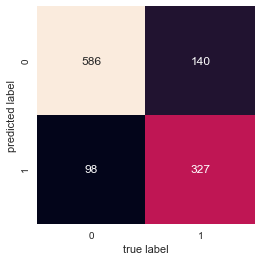

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_4, y_pred_2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.  Did this model predict test data better than your previous models?  


The best model is KNN as the accuracy is 0.816. The three new varaibles I select are 'word_freq_you', 'char_freq_[', and capital_run_length_total.

In [29]:

#X1=df.iloc[:, 16]   #business
#X2=df.iloc[:, 47] #conference
#X3=df.iloc[:,51] #CHAR_!

X4=df.iloc[:, 18]
X5=df.iloc[:, 50]
X6=df.iloc[:,-2]

print (X4.head())
print(X5.head())
print(X6.head())

0    1.93
1    3.47
2    1.36
3    3.18
4    3.18
Name: word_freq_you:, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: char_freq_[:, dtype: float64
0     278
1    1028
2    2259
3     191
4     191
Name: capital_run_length_total:, dtype: int64


In [30]:
X_new=df.iloc[:,[16, 18, 47, 50, 51, -2]]
X_new.head()

,word_freq_business:,word_freq_you:,word_freq_conference:,char_freq_[:,char_freq_!:,capital_run_length_total:
0,0.00,1.93,0.0,0.0,0.778,278
1,0.07,3.47,0.0,0.0,0.372,1028
2,0.06,1.36,0.0,0.0,0.276,2259
3,0.00,3.18,0.0,0.0,0.137,191
4,0.00,3.18,0.0,0.0,0.135,191


In [31]:
#KNN
#k=5
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_new, y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_5, y_train_5)

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(knn.score(X_test_5, y_test_5)))

y_pred = knn.predict(X_test_5)

accuracy: 0.77


In [32]:
#k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_5, y_train_5)

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(knn.score(X_test_5, y_test_5)))

y_pred = knn.predict(X_test_5)

accuracy: 0.74


Thus, k=5 is selected as the parameter. And the accuracy is worse than previous one.


#13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

In [33]:
#Logistic Regression
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_new, y, random_state=624) 
logreg = LogisticRegression(C=1e90).fit(X_train_6, y_train_6)

print("logreg .coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train_6, y_train_6)))
print("Test set score: {:.3f}".format(logreg.score(X_test_6, y_test_6)))

predicted_vals = logreg.predict(X_test_6) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))
logreg

logreg .coef_: [[ 1.58745946e+00  2.89224549e-01 -5.46451853e+00 -2.61432989e+00
   1.42931574e+00  1.50169334e-03]]
Training set score: 0.782
Test set score: 0.774
logreg.predict: [0 0 0 ... 0 0 0]


LogisticRegression(C=1e+90, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
cross_val_score(LogisticRegression(), X_new, y, cv=kfold)

array([0.35504886, 0.44021739, 0.83913043, 0.87173913, 0.74347826])

In [35]:
X_train_6_new = sm.add_constant(X_train_6)
model_6 = sm.GLM(y_train_6, X_train_6_new, family=sm.families.Binomial()).fit()

model_6.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:933: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   spam   No. Observations:                 3450
Model:                            GLM   Df Residuals:                     3443
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 22 Jun 2019   Deviance:                          inf
Time:                        00:02:42   Pearson chi2:                 4.50e+15
No. Iterations:                     4   Covariance Type:             nonrobust
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.8106      0.073    -24.925      0.000      -1.953      -1.668
word_freq_business:           1.5948      0.153     10.402      0.000       1.294       1.895
word_freq_you:                0.2891      0.024     12.196      0.000       0.243       0.336
word_freq_conference:        -5.9316      0.884     -6.710      0.000      -7.664      -4.199
char_freq_[:                 -2.6963      0.861     -3.133      0.002      -4.383      -1.010
char_freq_!:                  1.4287      0.119     12.047      0.000       1.196       1.661
capital_run_length_total:     0.0015      0.000     12.961      0.000       0.001       0.002
=============================================================================================
"""

In [36]:
#Linear Regression
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_new, y, random_state=625)
lr = LinearRegression().fit(X_train_7, y_train_7)

#The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
#..attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 2.50216452e-01  6.27437722e-02 -1.06684158e-01 -1.42953653e-01
  8.57230655e-02  1.72601379e-04]
lr.intercept_: 0.18458203865089523


In [37]:
cross_val_score(LinearRegression(), X_train_7, y_train_7, cv=10)

array([ 0.24224233,  0.25470955,  0.2350052 ,  0.20874053,  0.15091186,
       -0.08828037,  0.20603581,  0.24542572,  0.23899355,  0.21183698])

In [38]:
print("Training set score: {:.2f}".format(lr.score(X_train_7, y_train_7)))
print("Test set score: {:.2f}".format(lr.score(X_test_7, y_test_7)))

Training set score: 0.22
Test set score: 0.23


In [39]:
X_train_7_new = sm.add_constant(X_train_7)
model_7 = sm.OLS(y_train_7, X_train_7_new ).fit()

model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spam   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     162.2
Date:                Sat, 22 Jun 2019   Prob (F-statistic):          5.76e-182
Time:                        00:02:42   Log-Likelihood:                -1992.0
No. Observations:                3450   AIC:                             3998.
Df Residuals:                    3443   BIC:                             4041.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1846      0.011     16.867      0.000       0.163       0.206
word_freq_business:           0.2502      0.017     14.784      0.000       0.217       0.283
word_freq_you:                0.0627      0.004     14.977      0.000       0.055       0.071
word_freq_conference:        -0.1067      0.027     -3.991      0.000      -0.159      -0.054
char_freq_[:                 -0.1430      0.065     -2.214      0.027      -0.270      -0.016
char_freq_!:                  0.0857      0.008     10.155      0.000       0.069       0.102
capital_run_length_total:     0.0002   1.14e-05     15.191      0.000       0.000       0.000
==============================================================================
Omnibus:                       30.753   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.655
Skew:                           0.218   Prob(JB):                     1.34e-07
Kurtosis:                       3.175   Cond. No.                     6.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X, y,
                                                random_state=626)
cross_val_score(RandomForestClassifier(), X_train_8, y_train_8, cv=10)


array([0.79479769, 0.75433526, 0.80869565, 0.79710145, 0.77971014,
       0.81449275, 0.7826087 , 0.8173913 , 0.80232558, 0.80813953])

In [41]:
model_8 = RandomForestClassifier(n_estimators=1000)
model_8.fit(X_train_4, y_train_4)
y_pred_8 = model.predict(X_test_8)

In [42]:
print(metrics.classification_report(y_pred_8, y_test_8))

             precision    recall  f1-score   support

          0       0.91      0.87      0.89       727
          1       0.79      0.86      0.82       424

avg / total       0.87      0.86      0.86      1151



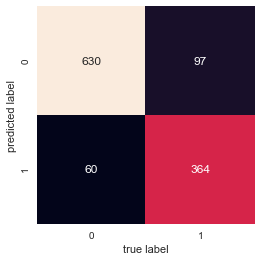

In [43]:
mat_1 = confusion_matrix(y_test_8, y_pred_8)
sns.heatmap(mat_1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?

The name of the email address. Some spam email's address has some specific characters and I think it is worth tokenizing


#15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.   (Include models we have learned through class 5 only).

1. K-Nearest Neighborhood;
2. Linear Regression;
3. Support Vector Machine;
4. Decision Tree;
5. Random Forest;